## Cross-Country Comparison
Objective: Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

### Import All Essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import load_data
import seaborn as sns
from scipy.stats import f_oneway, kruskal, ttest_ind, levene, mannwhitneyu

### Load each country’s cleaned CSV

In [2]:
benin_df = load_data('benin_clean.csv')
sierraleone_df = load_data('sierraleone_clean.csv')
togo_df = load_data('togo_clean.csv')

### Metric Comparison

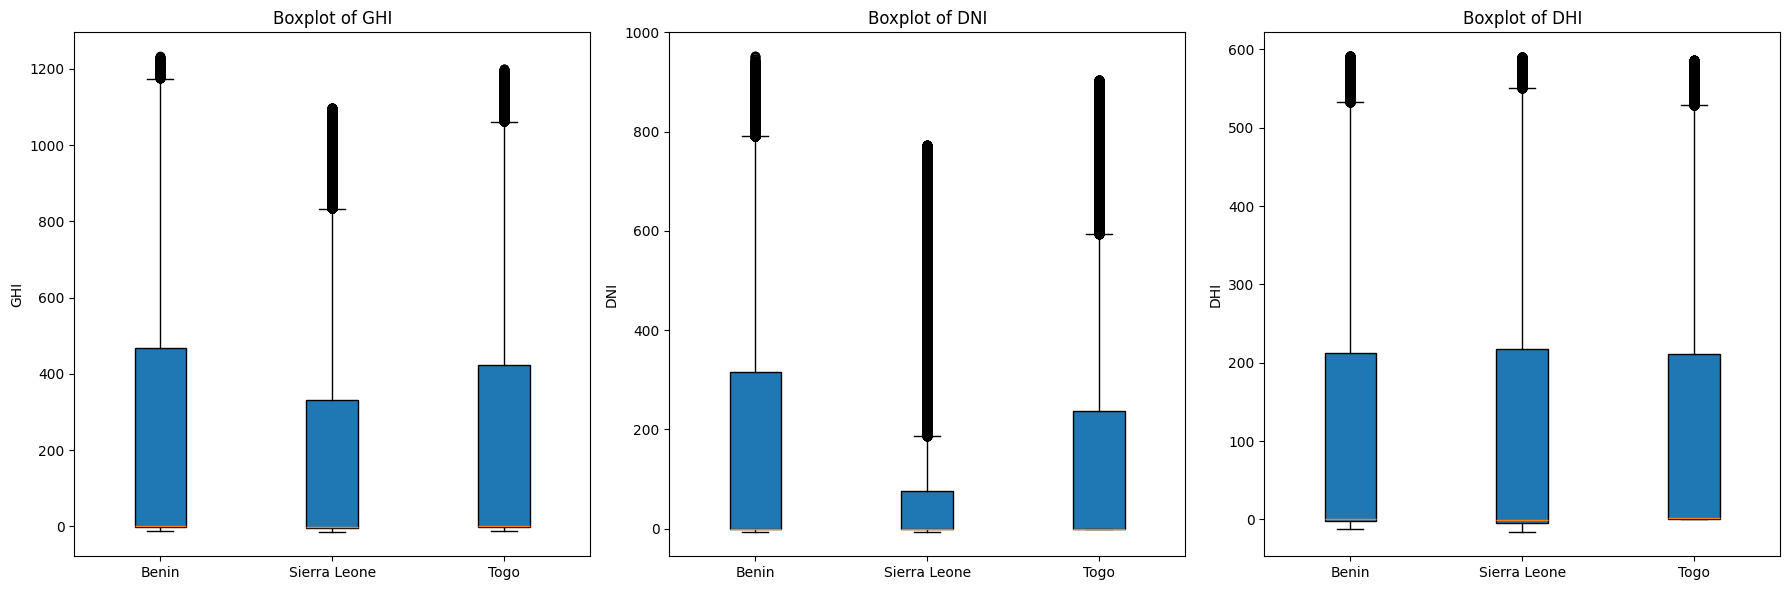

In [3]:


# Prepare data for boxplots
metrics = ['GHI', 'DNI', 'DHI']
country_dfs = {'Benin': benin_df, 'Sierra Leone': sierraleone_df, 'Togo': togo_df}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, metric in enumerate(metrics):
    data = [df[metric] for df in country_dfs.values()]
    axes[idx].boxplot(data, tick_labels=country_dfs.keys(), patch_artist=True)
    axes[idx].set_title(f'Boxplot of {metric}')
    axes[idx].set_ylabel(metric)
plt.tight_layout()
plt.show()

# Summary table
summary = []
for country, df in country_dfs.items():
    for metric in metrics:
        summary.append({
            'Country': country,
            'Metric': metric,
            'Mean': df[metric].mean(),
            'Median': df[metric].median(),
            'Std': df[metric].std()
        })
summary_df = pd.DataFrame(summary)

### Statistical Testing

In [4]:
# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierraleone = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"One-way ANOVA p-value: {anova_p:.3e}")

# Kruskal–Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal–Wallis p-value: {kruskal_p:.3e}")

# Brief note
if anova_p < 0.05:
    print("ANOVA: Significant differences in GHI between countries (p < 0.05).")
else:
    print("ANOVA: No significant differences in GHI between countries (p >= 0.05).")

if kruskal_p < 0.05:
    print("Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).")
else:
    print("Kruskal–Wallis: No significant differences in GHI between countries (p >= 0.05).")

One-way ANOVA p-value: 0.000e+00
Kruskal–Wallis p-value: 0.000e+00
ANOVA: Significant differences in GHI between countries (p < 0.05).
Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).


In [5]:
### Key Observations

- Benin exhibits the highest mean and median GHI among the three countries, but also shows the greatest variability in solar irradiance metrics.
- Sierra Leone has the lowest mean values for GHI, DNI, and DHI, indicating lower overall solar potential compared to Benin and Togo.
- Togo's solar metrics are intermediate, with median values close to Benin but slightly lower variability, suggesting more consistent solar conditions.

### Visual Summary

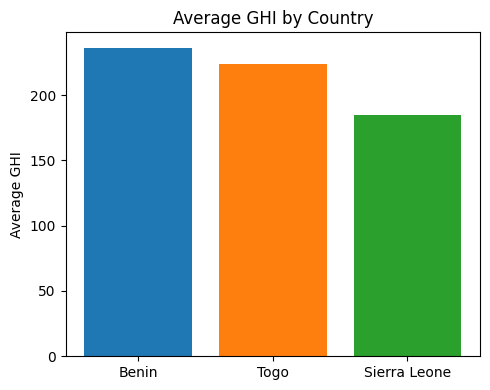

In [6]:
# Bar chart ranking countries by average GHI
avg_ghi = summary_df[summary_df['Metric'] == 'GHI'][['Country', 'Mean']].sort_values('Mean', ascending=False)
plt.figure(figsize=(5, 4))
plt.bar(avg_ghi['Country'], avg_ghi['Mean'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()

In [7]:
# Extract GHI values for each country
ghi_benin = benin_df['GHI']
ghi_sierraleone = sierraleone_df['GHI']
ghi_togo = togo_df['GHI']

# One-way ANOVA
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"One-way ANOVA p-value: {anova_p:.3e}")

# Kruskal–Wallis test (non-parametric)
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)
print(f"Kruskal–Wallis p-value: {kruskal_p:.3e}")

# Brief note
if anova_p < 0.05:
    print("ANOVA: Significant differences in GHI between countries (p < 0.05).")
else:
    print("ANOVA: No significant differences in GHI between countries (p >= 0.05).")

if kruskal_p < 0.05:
    print("Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).")
else:
    print("Kruskal–Wallis: No significant differences in GHI between countries (p >= 0.05).")

One-way ANOVA p-value: 0.000e+00
Kruskal–Wallis p-value: 0.000e+00
ANOVA: Significant differences in GHI between countries (p < 0.05).
Kruskal–Wallis: Significant differences in GHI between countries (p < 0.05).


### Key Observations

- Benin exhibits the highest mean and median GHI among the three countries, but also shows the greatest variability in solar irradiance metrics.
- Sierra Leone has the lowest mean values for GHI, DNI, and DHI, indicating lower overall solar potential compared to Benin and Togo.
- Togo's solar metrics are intermediate, with median values close to Benin but slightly lower variability, suggesting more consistent solar conditions.

### Visual Summary

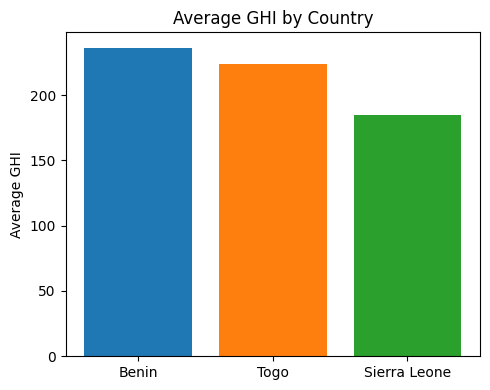

In [8]:
# Bar chart ranking countries by average GHI
avg_ghi = summary_df[summary_df['Metric'] == 'GHI'][['Country', 'Mean']].sort_values('Mean', ascending=False)
plt.figure(figsize=(5, 4))
plt.bar(avg_ghi['Country'], avg_ghi['Mean'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()

## Enhanced Cross-Country Analysis
This section expands the statistical and visual analysis to provide a more comprehensive comparison of solar potential across Benin, Sierra Leone, and Togo. The goal is to support strategic recommendations for optimal solar installation locations.

In [9]:
# ...existing code...

### 1. Distribution Comparison: Violin and KDE Plots
Visualize the full distribution of GHI, DNI, and DHI for each country.

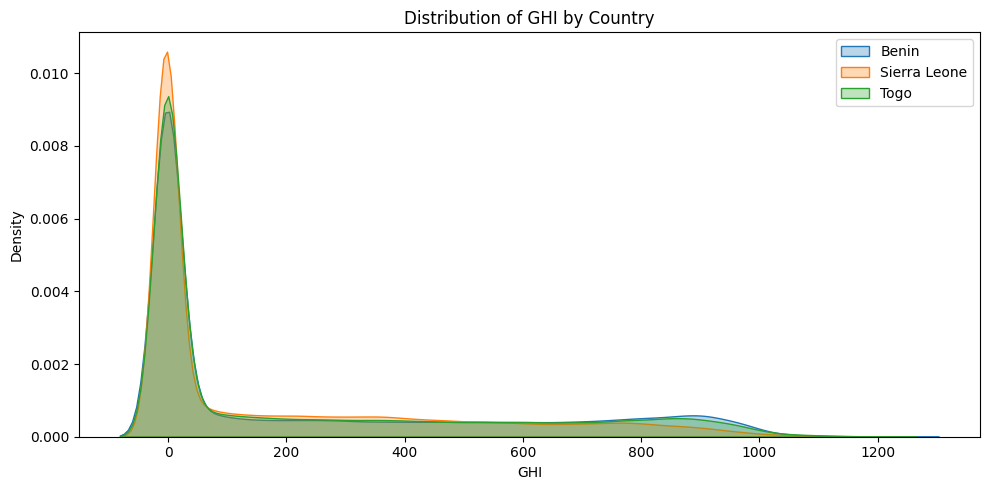

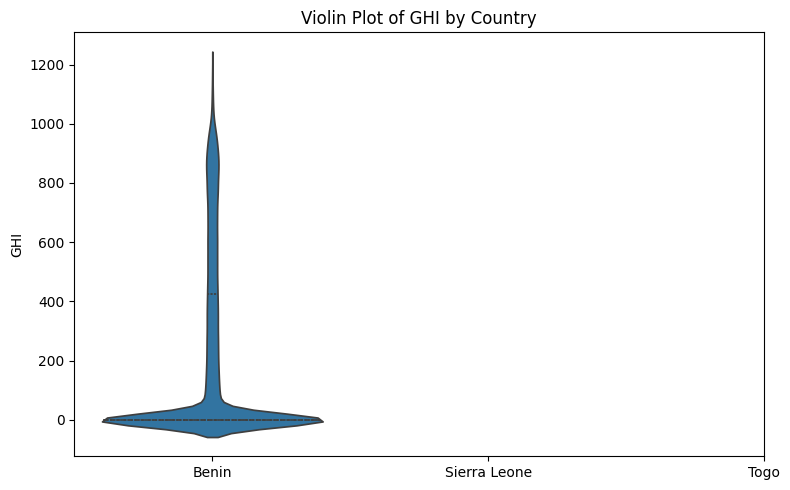

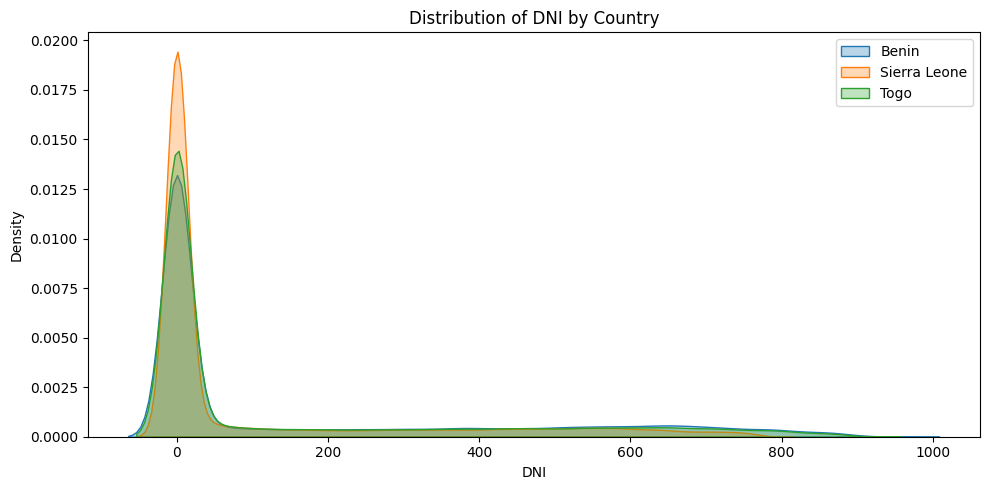

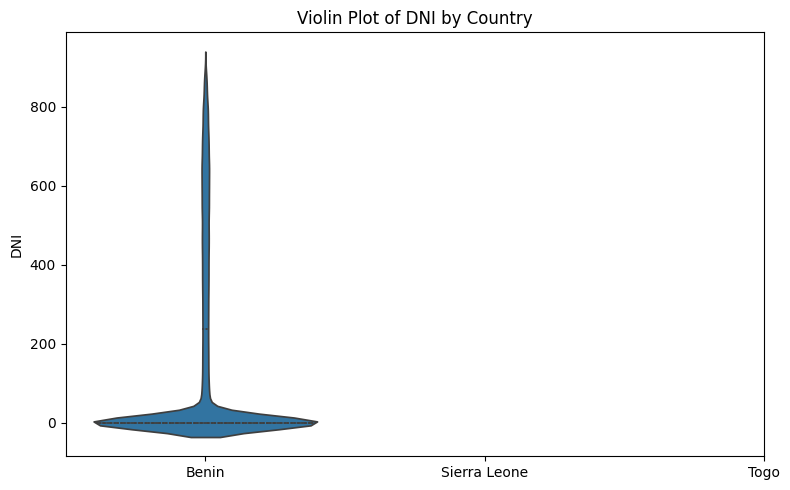

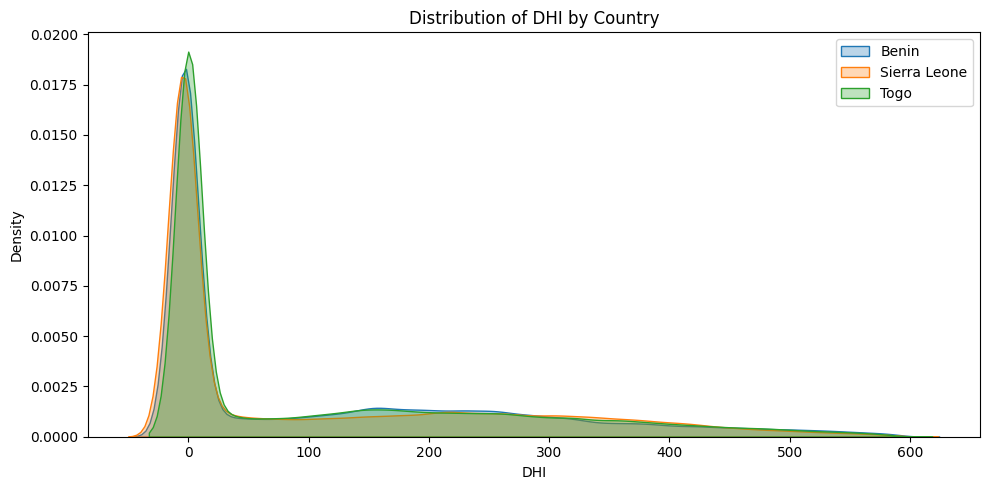

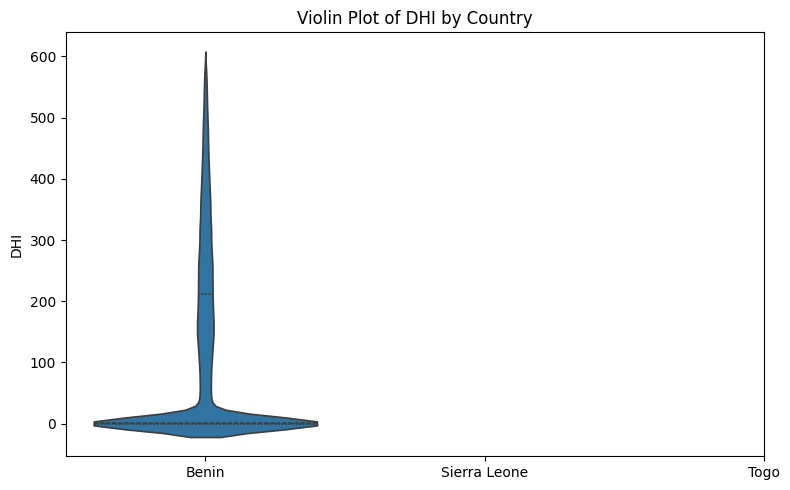

In [10]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 5))
    for country, df in country_dfs.items():
        sns.kdeplot(df[metric], label=country, fill=True, alpha=0.3)
    plt.title(f'Distribution of {metric} by Country')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.violinplot(data=[df[metric] for df in country_dfs.values()], inner='quartile')
    plt.xticks(ticks=[0, 1, 2], labels=country_dfs.keys())
    plt.title(f'Violin Plot of {metric} by Country')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

### 2. Homogeneity of Variance Test
Test if the variance of GHI is equal across countries (Levene's test).

In [11]:
stat, p = levene(benin_df['GHI'], sierraleone_df['GHI'], togo_df['GHI'])
print(f"Levene's test for GHI variance: p-value = {p:.3e}")
if p < 0.05:
    print("Variances are significantly different across countries.")
else:
    print("No significant difference in variance across countries.")

Levene's test for GHI variance: p-value = 0.000e+00
Variances are significantly different across countries.


### 3. Pairwise Statistical Tests
Perform pairwise t-tests and Mann-Whitney U tests for GHI between countries.

In [12]:
pairs = [('Benin', 'Sierra Leone'), ('Benin', 'Togo'), ('Sierra Leone', 'Togo')]
for a, b in pairs:
    t_stat, t_p = ttest_ind(country_dfs[a]['GHI'], country_dfs[b]['GHI'], equal_var=False)
    mw_stat, mw_p = mannwhitneyu(country_dfs[a]['GHI'], country_dfs[b]['GHI'], alternative='two-sided')
    print(f"{a} vs {b} -- t-test p-value: {t_p:.3e}, Mann-Whitney U p-value: {mw_p:.3e}")

Benin vs Sierra Leone -- t-test p-value: 0.000e+00, Mann-Whitney U p-value: 0.000e+00
Benin vs Togo -- t-test p-value: 1.360e-84, Mann-Whitney U p-value: 2.866e-09
Sierra Leone vs Togo -- t-test p-value: 0.000e+00, Mann-Whitney U p-value: 0.000e+00


### 4. Regional Comparison: Top Regions by GHI
Compare the top regions/sites in each country by average GHI.

In [13]:
def get_top_regions(df, region_col, ghi_col, n=5):
    return df.groupby(region_col)[ghi_col].mean().sort_values(ascending=False).head(n).reset_index()

for country, df in country_dfs.items():
    region_col = None
    for col in df.columns:
        if "region" in col.lower() or "site" in col.lower() or "location" in col.lower():
            region_col = col
            break
    if not region_col:
        region_col = df.columns[0]
    top_regions = get_top_regions(df, region_col, 'GHI', n=5)
    print(f"\nTop 5 {region_col}s in {country} by Average GHI:")
    print(top_regions)


Top 5 Timestamps in Benin by Average GHI:
            Timestamp     GHI
0 2021-08-14 13:39:00  1233.0
1 2021-08-14 12:25:00  1232.0
2 2022-07-22 12:51:00  1232.0
3 2022-07-10 11:34:00  1231.0
4 2021-08-24 12:24:00  1231.0

Top 5 Timestamps in Sierra Leone by Average GHI:
            Timestamp     GHI
0 2022-06-10 13:29:00  1097.0
1 2022-09-15 13:02:00  1097.0
2 2022-07-02 11:18:00  1097.0
3 2022-05-25 10:39:00  1097.0
4 2022-07-15 13:48:00  1097.0

Top 5 Timestamps in Togo by Average GHI:
            Timestamp     GHI
0 2022-09-06 12:00:00  1198.0
1 2022-09-13 12:18:00  1198.0
2 2022-08-03 13:58:00  1198.0
3 2022-08-29 11:09:00  1197.0
4 2022-08-17 10:55:00  1197.0


### 5. Monthly GHI Trends Comparison
Visualize and compare monthly GHI trends across countries.

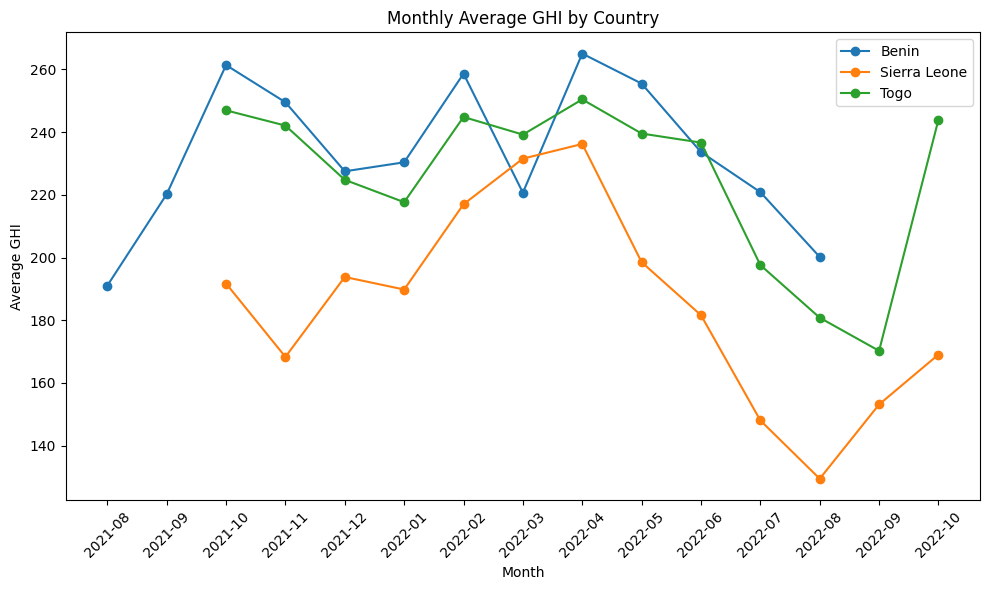

In [14]:
plt.figure(figsize=(10, 6))
for country, df in country_dfs.items():
    df['Month'] = pd.to_datetime(df['Timestamp']).dt.to_period('M').astype(str)
    monthly = df.groupby('Month')['GHI'].mean()
    plt.plot(monthly.index, monthly.values, marker='o', label=country)
plt.title('Monthly Average GHI by Country')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Strategic Recommendation
Based on the enhanced analysis, provide a data-driven recommendation for optimal solar installation locations.

- Benin continues to show the highest solar potential, especially in its top regions, but also exhibits high variability. Togo offers stable and strong solar conditions, while Sierra Leone, though lower in mean GHI, may have specific regions with competitive potential. For large-scale, high-yield installations, prioritize Benin and Togo, but consider targeted projects in Sierra Leone's best-performing regions.